In [716]:
# Import needed libraries 

import pandas as pd 
import os
from datetime import timedelta
import numpy as np 
from scipy.signal import argrelextrema
import alpaca_trade_api as tradeapi 
import matplotlib.pyplot as plt 
import matplotlib.dates as mpdates
from mplfinance.original_flavor import candlestick_ohlc
from dotenv import load_dotenv
from itertools import islice

In [717]:
# Load .env file

load_dotenv()

True

In [718]:
# Set Alpaca API key and secret passwords

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [719]:
# Initiate REST API

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [720]:
# Parameters for Stock Data from Alpacas
# Establish time frame (5 minute)

time_frame = "5min"

# Identify what stock symbol is trading

stock_symbol = "QQQ"

# Identify what start date to begin data analysis
# JAN 27 27 2021 GameStop event (GME) are we still doing this?

start_date = pd.Timestamp("2021-01-27", tz="America/New_York").isoformat()

# Identify what end date to finalize data analysis

end_date = pd.Timestamp("2021-1-28", tz="America/New_York").isoformat()

In [721]:
# Call stock data from identified period of time

stock_data = api.get_bars(
    stock_symbol, 
    time_frame, 
    start = start_date, 
    end = end_date
).df

In [722]:
# Displays the information pulled for working through code

stock_data.info()
display(stock_data.head())
display(stock_data.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191 entries, 2021-01-27 09:00:00+00:00 to 2021-01-28 00:55:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        191 non-null    float64
 1   high         191 non-null    float64
 2   low          191 non-null    float64
 3   trade_count  191 non-null    int64  
 4   open         191 non-null    float64
 5   volume       191 non-null    int64  
 6   vwap         191 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.9 KB


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-27 09:00:00+00:00,330.42,330.58,329.93,43,329.93,10740,330.213696
2021-01-27 09:05:00+00:00,330.24,330.36,330.24,34,330.36,3193,330.313439
2021-01-27 09:10:00+00:00,330.21,330.24,330.18,14,330.18,1124,330.211967
2021-01-27 09:15:00+00:00,330.26,330.26,330.25,7,330.25,1360,330.254412
2021-01-27 09:20:00+00:00,330.13,330.25,330.13,10,330.23,1271,330.200189


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-28 00:35:00+00:00,317.14,317.14,316.87,96,316.87,28863,316.995793
2021-01-28 00:40:00+00:00,317.31,317.34,317.10,108,317.21,15182,317.154442
2021-01-28 00:45:00+00:00,317.29,317.47,317.21,108,317.47,18718,317.298227
2021-01-28 00:50:00+00:00,317.00,317.28,317.00,160,317.28,21358,317.156206
2021-01-28 00:55:00+00:00,317.20,317.24,316.99,133,316.99,21514,317.127020


In [723]:
# # Clean up DF keep Open, High, Low, Close, Volume (OHLCV)

# stock_data = stock_data.drop(columns=["trade_count", 'vwap'], axis=1)

# # Convert index

stock_data.head()

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-27 09:00:00+00:00,330.42,330.58,329.93,43,329.93,10740,330.213696
2021-01-27 09:05:00+00:00,330.24,330.36,330.24,34,330.36,3193,330.313439
2021-01-27 09:10:00+00:00,330.21,330.24,330.18,14,330.18,1124,330.211967
2021-01-27 09:15:00+00:00,330.26,330.26,330.25,7,330.25,1360,330.254412
2021-01-27 09:20:00+00:00,330.13,330.25,330.13,10,330.23,1271,330.200189


In [724]:
# Isolate closing prices to use for plotting stock data
#close = stock_data['close']

#print(close)

/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/sr/78cv2dx14kgdcwtf90634z580000gn/T/ipykernel_1163/187242432.py:21: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
/var/folders/sr/78cv2dx14kgdcwtf90634z580000gn/T/ipykernel_1163/187242432.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
/var/folders/sr/78cv2dx14kgdcwtf90634z580000gn/T/ipykernel_1163/187242432.py:23: RankWarning: Polyfit may be poorly conditioned
 

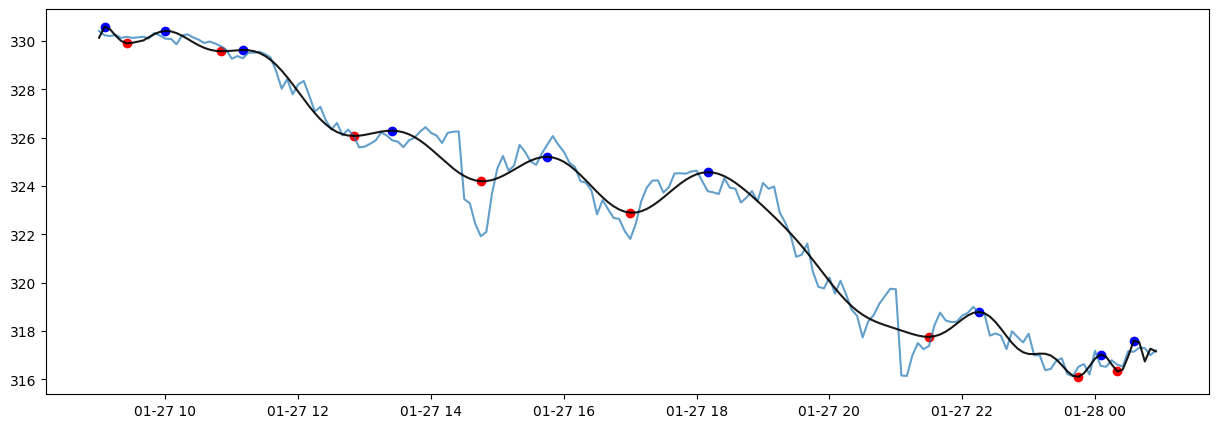

In [725]:
# Plot the stock data and identified minima

plt.figure(figsize=(15, 5))

# Establishes dimensions for x-axis

min_length = min(len(stock_data.index), len(stock_data['close']))
plt.plot(stock_data.index, stock_data["close"], label='Close Prices', alpha=0.7)

# ***Polynomial Fit***
# Establish the x-axis

x_data = np.arange(min_length)

# Identify degree of polynomial, this can be adjuster at a later date if needed

polynomial_degree = 75

# Calculate the polynomial coefficients to fit the stock data (OHLC)

polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
polynomial_coefficients_low = np.polyfit(x_data, stock_data['low'][:min_length], polynomial_degree)
polynomial_coefficients_close = np.polyfit(x_data, stock_data['close'][:min_length], polynomial_degree)

# Evaluate the polynomial for plotting (OHLC)

y_polynomial_open = np.polyval(polynomial_coefficients_open, x_data)
y_polynomial_high = np.polyval(polynomial_coefficients_high, x_data)
y_polynomial_low = np.polyval(polynomial_coefficients_low, x_data)
y_polynomial_close = np.polyval(polynomial_coefficients_close, x_data)

# Review polynomial data

#print(len(y_polynomial_close))
#print(y_polynomial_close)

# Identify Local Extrema for polynomial fit data (minima and maxima)

local_poly_minima = argrelextrema(y_polynomial_close, np.less, order=5)[0]
local_poly_maxima = argrelextrema(y_polynomial_close, np.greater, order=5)[0]


# Plot polynomial fit

plt.plot(stock_data.index[:min_length], y_polynomial_close, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# Plot red dots at local minima and blue dots at local maxima

plt.scatter(stock_data.index[local_poly_minima], y_polynomial_close[local_poly_minima], color='red', label='Local Minima')
plt.scatter(stock_data.index[local_poly_maxima],y_polynomial_close[local_poly_maxima], color="blue", label = "Local Maxima")

# # # Define parameters for double-bottom pattern detection
# y_delta = 0.03  # Adjust as needed
# threshold = lows.min() * 1.15

# # Identify potential double-bottom patterns
# # suspected_bottoms = []
# # suspected_tops = []
# # for index in local_poly_minima_df:
# #    avg_price = lows.iloc[max(0, index - 5): min(len(lows), index + 5)].mean()
# #    if lows.iloc[index] < threshold:
# #        suspected_bottoms.append(index)

# # # Plot the identified double-bottom patterns
# # plt.figure(figsize=(15, 5))
# # plt.plot(stock_data.index, lows, label='Low Prices', alpha=0.7)
# # plt.scatter(stock_data.index[suspected_bottoms], lows.iloc[suspected_bottoms], color='green', label='Double Bottoms')
# # plt.axhline(threshold, linestyle='--', color='blue', label='Threshold')
# # plt.title('Identified Double-Bottom Patterns')
# # plt.xlabel('Date')
# # plt.ylabel('Low Prices')
# # plt.legend()
# # plt.show()

In [726]:
# Convert the close price polynomial fit data into a dataframe
# This is done for OHLC poly fit data

poly_df = pd.DataFrame(y_polynomial_open)
columns = ['poly_fit_open']
poly_df.columns = columns
poly_df = poly_df.assign(poly_fit_high = y_polynomial_high)
poly_df = poly_df.assign(poly_fit_low = y_polynomial_low)
poly_df = poly_df.assign(poly_fit_close = y_polynomial_close)

poly_df.head()

,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close
0,329.655203,330.273372,329.685748,330.141179
1,330.569581,330.712079,330.483755,330.592665
2,330.608739,330.573873,330.503201,330.483677
3,330.340590,330.281835,330.259630,330.221872
4,330.061427,330.042912,330.017078,330.006580


In [727]:
# Reset the index of the original updated ticker dataframe to concat with the polynomial dataframe that does not include a timeseries
# This will ensure that the indexed intergers of the ploynomial fit align with the time each data point corresponds to

updated_stock_data = stock_data.reset_index()
updated_stock_data = pd.concat([updated_stock_data, poly_df], axis='columns', join='inner')
updated_stock_data.head()


,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close
0,2021-01-27 09:00:00+00:00,330.42,330.58,329.93,43,329.93,10740,330.213696,329.655203,330.273372,329.685748,330.141179
1,2021-01-27 09:05:00+00:00,330.24,330.36,330.24,34,330.36,3193,330.313439,330.569581,330.712079,330.483755,330.592665
2,2021-01-27 09:10:00+00:00,330.21,330.24,330.18,14,330.18,1124,330.211967,330.608739,330.573873,330.503201,330.483677
3,2021-01-27 09:15:00+00:00,330.26,330.26,330.25,7,330.25,1360,330.254412,330.340590,330.281835,330.259630,330.221872
4,2021-01-27 09:20:00+00:00,330.13,330.25,330.13,10,330.23,1271,330.200189,330.061427,330.042912,330.017078,330.006580


In [728]:
# Add minima and maxima column to the DataFrame

#updated_stock_data[columns = {'minima',"maxima"}] = 0  # Initialize 'minima' column with zeros
updated_stock_data["minima"] = 0
updated_stock_data["maxima"] = 0
updated_stock_data.head()

# Mark rows with local minima as 1 in the 'minima' column
# Can we clean this up??? use one for loop with if statements?

for index in local_poly_minima:
    updated_stock_data.at[index, 'minima'] = -1

for index in local_poly_maxima:
    updated_stock_data.at[index, "maxima"] = 1

#updated_stock_data.head(50)

In [729]:
# Create Target Columns - Double Top Target & Double Bottom Target
updated_stock_data["dbl_top_target"] = 0
updated_stock_data["dbl_bot_target"] = 0

updated_stock_data.head()
updated_stock_data.tail(50)

,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close,minima,maxima,dbl_top_target,dbl_bot_target
141,2021-01-27 20:50:00+00:00,319.44,319.8000,318.930,10728,319.12,1244605,319.405453,318.377192,319.304709,317.478731,318.246684,0,0,0,0
142,2021-01-27 20:55:00+00:00,319.75,319.9650,319.040,17786,319.45,3471685,322.707471,318.285011,319.311012,317.332400,318.170796,0,0,0,0
143,2021-01-27 21:00:00+00:00,319.73,320.6400,319.430,1478,319.75,2182163,319.541035,318.191688,319.299293,317.195765,318.096488,0,0,0,0
144,2021-01-27 21:05:00+00:00,316.16,320.4900,315.710,1527,319.70,613930,318.885917,318.094984,319.259705,317.071351,318.021287,0,0,0,0
145,2021-01-27 21:10:00+00:00,316.14,319.3261,314.060,2229,316.11,1748581,318.090858,317.996072,319.186972,316.964410,317.945753,0,0,0,0
146,2021-01-27 21:15:00+00:00,317.00,317.2400,316.000,618,316.20,503212,326.351524,317.899844,319.081445,316.882819,317.873778,0,0,0,0
147,2021-01-27 21:20:00+00:00,317.50,318.0100,316.880,532,316.89,92131,317.416458,317.814664,318.949465,316.836398,317.812362,0,0,0,0
148,2021-01-27 21:25:00+00:00,317.25,317.5000,317.210,238,317.43,24323,317.392983,317.751391,318.802839,316.835671,317.770738,0,0,0,0
149,2021-01-27 21:30:00+00:00,317.38,317.9400,315.320,1366,317.39,300949,316.986959,317.721795,318.657465,316.890078,317.758901,-1,0,0,0
150,2021-01-27 21:35:00+00:00,318.25,319.4100,316.770,490,317.48,401465,318.983513,317.736426,318.531144,317.005887,317.785696,0,0,0,0


In [730]:
# Initialize variables to identify double top/bottom patterns
    # Time dependent variable x_0 will always begin at a local min/max which also coincides
    # With the start of a trend into a potential double top/bottom
    
x_0 = 0

# Initiation of double top/bottom variable
    
a = 0

# First peak/valley of double top/bottom pattern
    
b = 0

# Trough/peak of double top/bottom pattern

c = 0

# Second peak/vallye of double top/bottom pattern
    
d = 0

# Trigger of double top/bottom pattern
    
e = 0

# Final time increment to finalize and trigger double top signal
    
x_f = 0

In [731]:
# Identify Double Top and Double Bottom Patterns
x_df = pd.DataFrame(x_df, columns = ["timestamp","close","high","low","trade_count","open","volume","vwap","poly_fit_open","poly_fit_high","poly_fit_low","poly_fit_close","minima","maxima","dbl_top_target","dbl_bot_target"])

for index, row in islice(updated_stock_data.iterrows(), 1, None):



    # Start of the algorithm to identify double top/bottoms in the stock data
    
    if (updated_stock_data.at[index,"minima"] == -1):
        x_df.loc[len(x_df.index)] = row
        a = updated_stock_data.iloc[index]["poly_fit_close"]
    elif (updated_stock_data.at[index,"maxima"] == 1):
        x_df.loc[len(x_df.index)] = row

display(x_df.head(50))
print()
print(row)
print()
print(a)

#OK. so here i am with the latest dataframe. i have reduced it to only the mins and maxs.
# if you review the printed row data you can see the index row that the latest min/max lies at.
# is there a way that i can add that information to the new isolated dataframe?
# in other words... the new data from has 49 rows. the last row refers to updated_stock_data df row 190.
# can i add that into the new DF. an additional column that has "190" (og_df_row_reference) or something stupid like that.
# i think if we can simplify that then we can easily calculatre double tops and double bottoms then write our target column
# on our original df.

,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close,minima,maxima,dbl_top_target,dbl_bot_target
0,2021-01-27 09:05:00+00:00,330.24,330.36,330.24,34,330.36,3193,330.313439,330.569581,330.712079,330.483755,330.592665,0,1,0,0
1,2021-01-27 09:25:00+00:00,330.18,330.18,330.09,20,330.13,6102,330.125497,329.895665,329.930733,329.882117,329.90878,-1,0,0,0
2,2021-01-27 10:00:00+00:00,330.1,330.18,330.02,18,330.13,1886,330.096882,330.427529,330.471844,330.353685,330.420427,0,1,0,0
3,2021-01-27 10:50:00+00:00,329.79,329.81,329.74,31,329.8,5102,329.771397,329.537809,329.633101,329.469609,329.580105,-1,0,0,0
4,2021-01-27 11:10:00+00:00,329.29,329.44,329.23,51,329.44,6109,329.339158,329.646468,329.721636,329.525376,329.631382,0,1,0,0
5,2021-01-27 12:50:00+00:00,326.09,326.48,325.87,193,326.4,40168,326.131713,326.11669,326.764352,325.786457,326.073788,-1,0,0,0
6,2021-01-27 13:25:00+00:00,325.89,326.17,325.83,308,326.13,28102,326.007461,326.353656,326.968901,326.187244,326.291938,0,1,0,0
7,2021-01-27 14:45:00+00:00,321.9199,323.06,321.6464,17182,322.45,1157445,322.408976,324.189211,324.639626,323.492048,324.200229,-1,0,0,0
8,2021-01-27 15:45:00+00:00,325.71,325.7799,325.28,2756,325.36,219508,325.560127,325.210808,325.605686,324.832261,325.209103,0,1,0,0
9,2021-01-27 17:00:00+00:00,321.81,322.21,321.81,5161,322.12,454300,322.031952,322.950487,323.302952,322.600739,322.899144,-1,0,0,0



timestamp         2021-01-28 00:55:00+00:00
close                                 317.2
high                                 317.24
low                                  316.99
trade_count                             133
open                                 316.99
volume                                21514
vwap                              317.12702
poly_fit_open                    316.950786
poly_fit_high                      317.2007
poly_fit_low                     316.943002
poly_fit_close                   317.157132
minima                                    0
maxima                                    0
dbl_top_target                            0
dbl_bot_target                            0
Name: 190, dtype: object

316.33117536540743
